In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

dataset = pd.concat([pd.DataFrame(data = X, columns=heart_disease.data.features_names), pd.DataFrame(data = y, columns = ['num'])], axis = 1)

In [36]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [37]:
dataset = dataset.dropna()
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


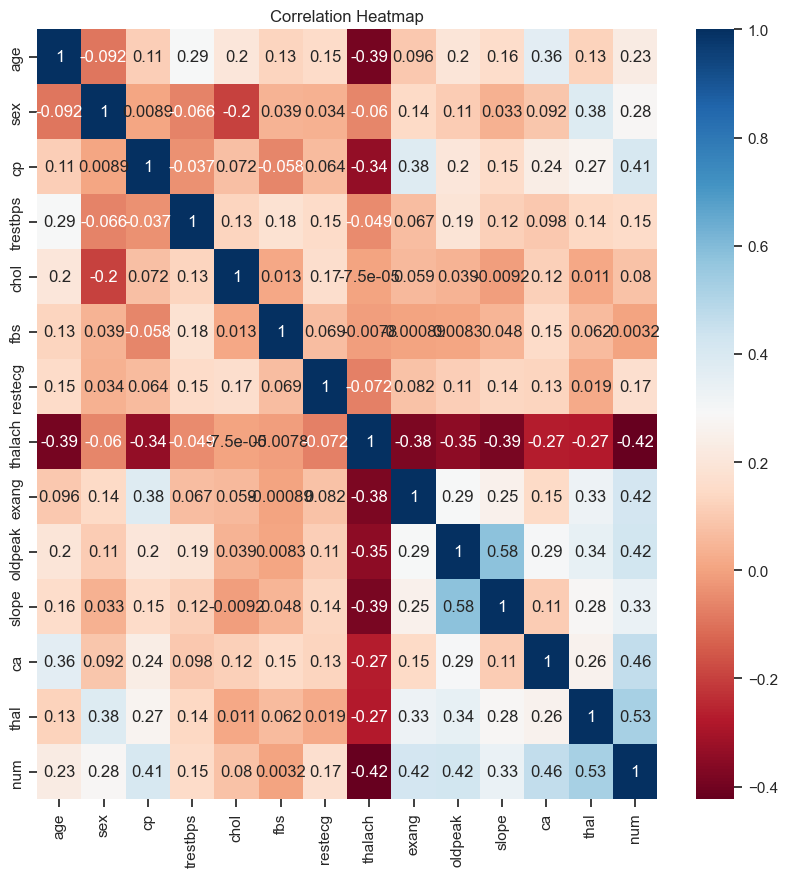

In [63]:
heat_map = dataset.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(heat_map, annot = True, cmap = 'RdBu')
plt.title("Correlation Heatmap")
plt.show()

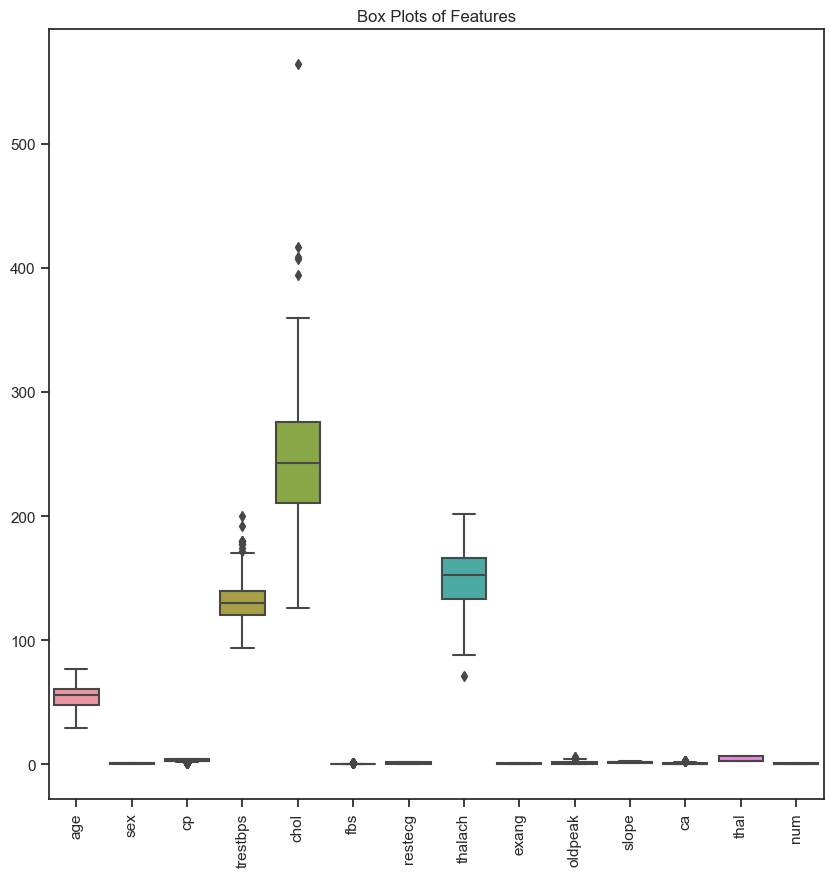

In [65]:
plt.figure(figsize = (10, 10))
sns.boxplot(data = dataset)
sns.set(style="ticks")
plt.title('Box Plots of Features')
plt.xticks(rotation=90)
plt.show()

# **Part A**

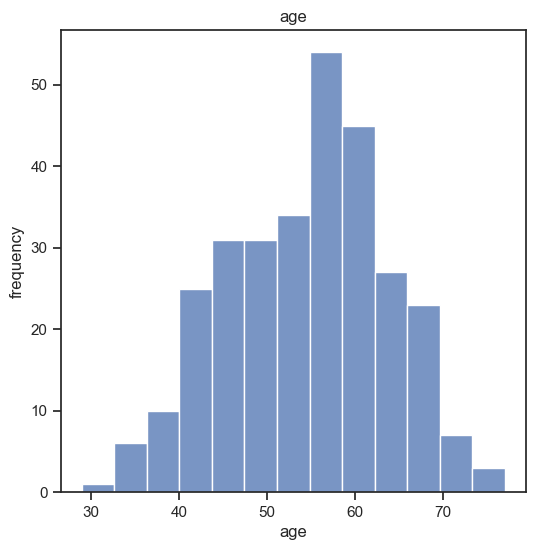

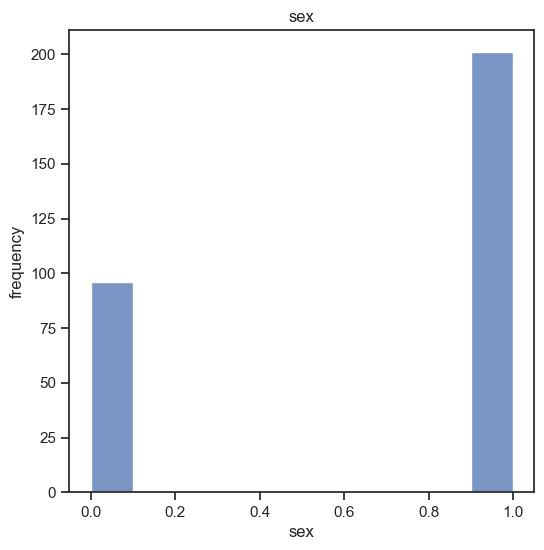

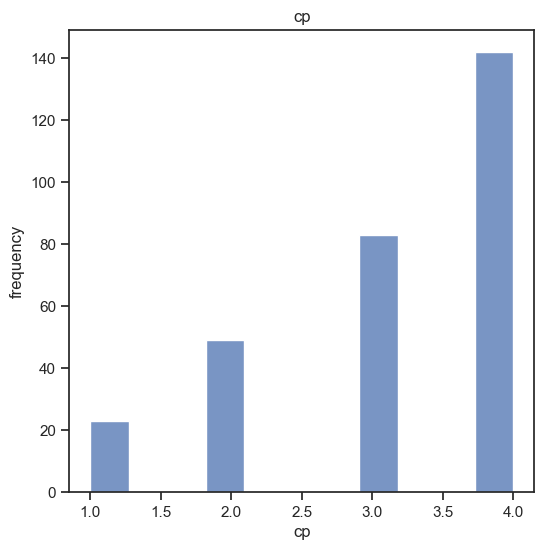

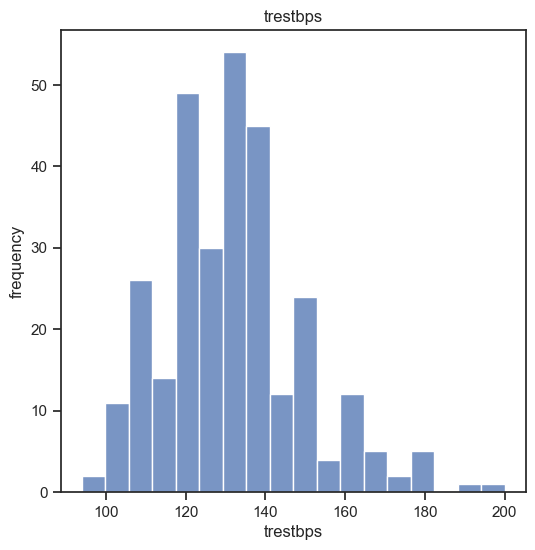

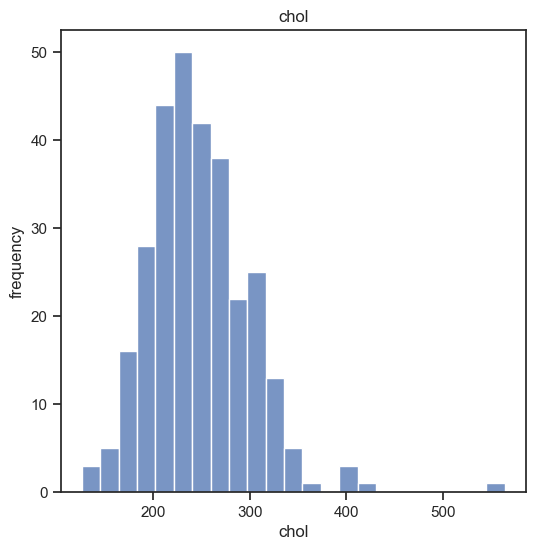

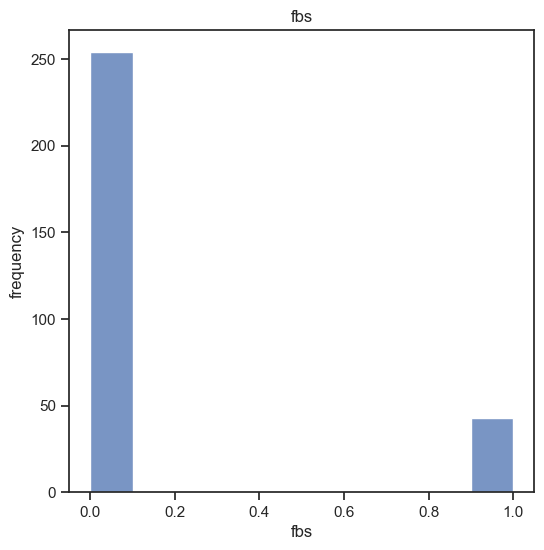

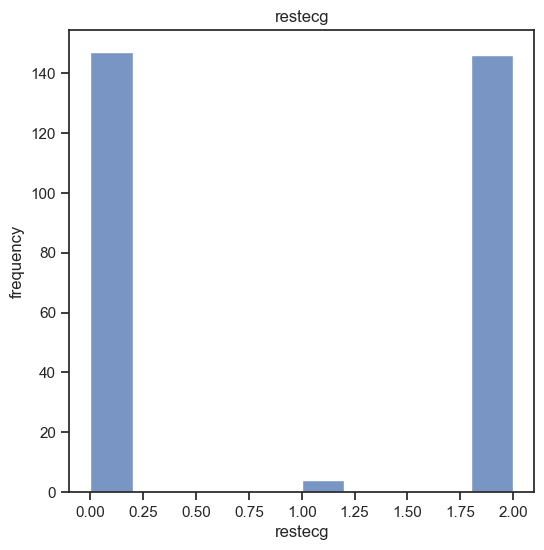

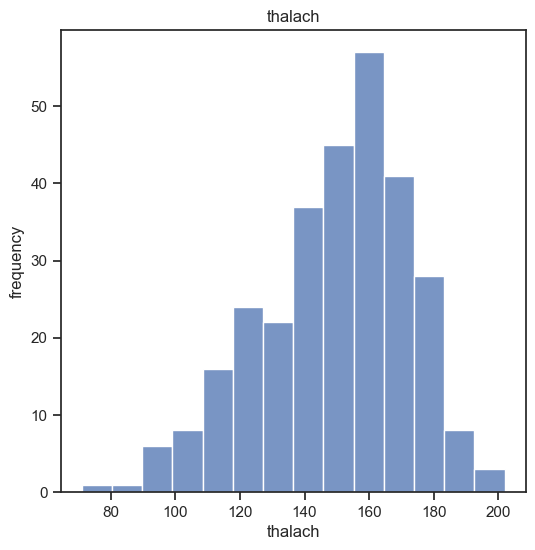

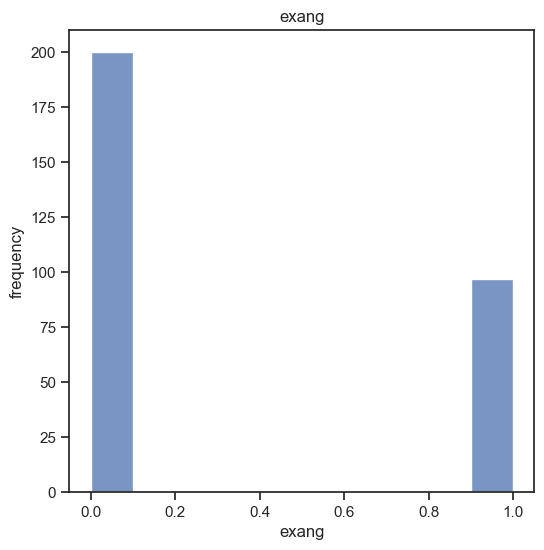

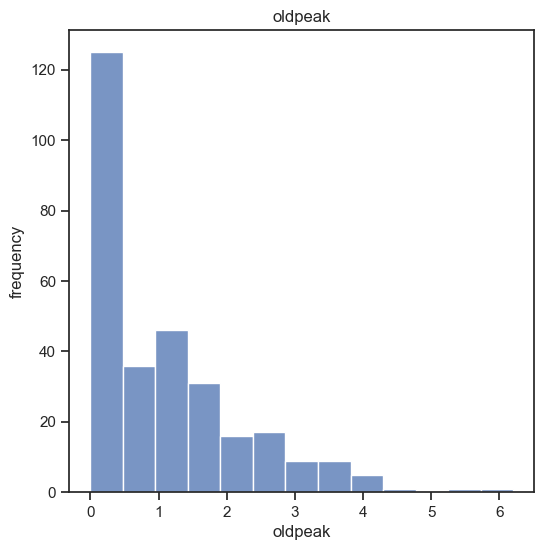

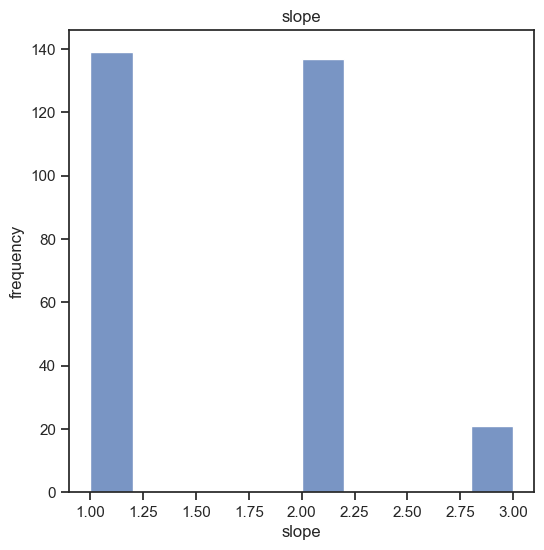

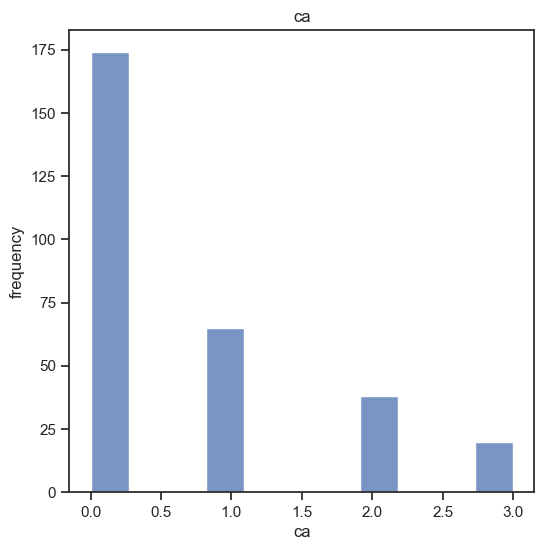

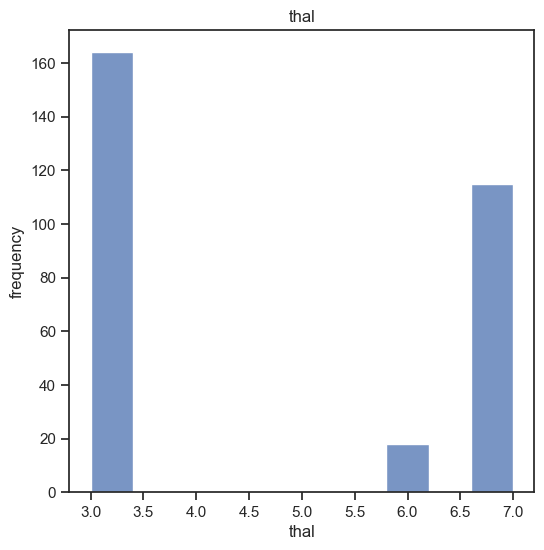

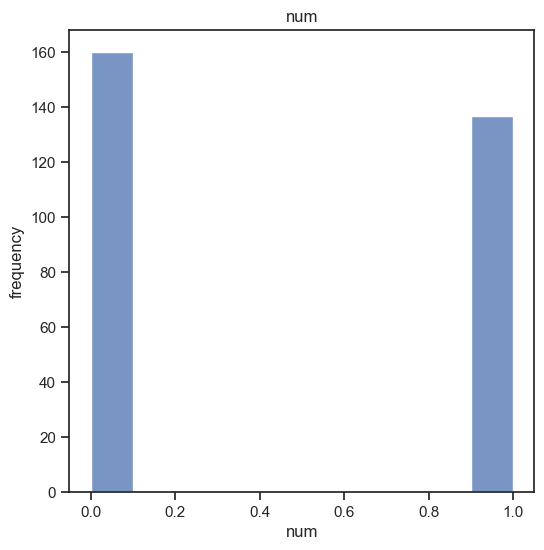

In [62]:
for column in dataset:
    plt.figure(figsize=(6,6))
    sns.histplot(dataset[column])
    plt.title(column)
    plt.ylabel('frequency')
    plt.show()

In [42]:
replacement_dict = {0: 0, 1: 1, 2: 1, 3: 1, 4: 1}
dataset['num'] = dataset['num'].replace(replacement_dict)

X = dataset.drop('num', axis=1)
y = dataset['num']


# **Part B**

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# **Part C**

In [49]:
criteria = ['entropy', 'gini']
best_criteria = ""
best_accuracy = 0
testing_accuracy = 0

for split in criteria:
    model = DecisionTreeClassifier(criterion=split)
    model.fit(X_train, y_train)
    accuracy = accuracy_score(model.predict(X_train), y_train)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_criteria = split
        testing_accuracy = accuracy_score(model.predict(X_test), y_test)
print("Best criteria is ", best_criteria, " with training accuracy ", best_accuracy)
print("Testing accuracy for the same is : ", testing_accuracy)

Best criteria is  entropy  with training accuracy  1.0
Testing accuracy for the same is :  0.7333333333333333


# **Part D**

In [53]:
param_grid = {
    'min_samples_split': [2, 5, 10, 15, 20, 30, 40],
    'max_features': [None, 'sqrt', 'log2']
}

model = DecisionTreeClassifier(criterion = best_criteria)
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model  = grid_search.best_estimator_
best_accuracy = grid_search.best_score_
print("Best training score with grid search is : ", best_accuracy, " and best parameters are ", best_params)


Best training score with grid search is :  0.7762411347517731  and best parameters are  {'max_features': 'log2', 'min_samples_split': 15}


In [54]:

print("Training score is : ", accuracy_score(y_train,  best_model.predict(X_train)))
print("Testing score is : ", accuracy_score(y_test,  best_model.predict(X_test)))

Training score is :  0.9029535864978903
Testing score is :  0.75


# **Part E**

In [55]:
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20, 30]
}

model = RandomForestClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best hyperparameters for Random Forest: {best_params} with cross-validated accuracy {best_accuracy}")

# Report the classification report on the test data
model = grid_search.best_estimator_
y_pred = model.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report on Test Data:")
print(classification_rep)

Best hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_split': 30, 'n_estimators': 250} with cross-validated accuracy 0.8524822695035462
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        30
           1       0.91      0.70      0.79        30

    accuracy                           0.82        60
   macro avg       0.83      0.82      0.81        60
weighted avg       0.83      0.82      0.81        60

